In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

In [107]:
life_df = pd.read_csv('Life Expectancy Data.csv')

life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [108]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [109]:
# Replacing the Null Values with mean values of the data
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', fill_value = None)

# life_df['Life expectancy ']=imputer.fit_transform(life_df[['Life expectancy ']])
# life_df['Adult Mortality']=imputer.fit_transform(life_df[['Adult Mortality']])
# life_df['Alcohol']=imputer.fit_transform(life_df[['Alcohol']])
# life_df['Hepatitis B']=imputer.fit_transform(life_df[['Hepatitis B']])
# life_df[' BMI ']=imputer.fit_transform(life_df[[' BMI ']])
# life_df['Polio']=imputer.fit_transform(life_df[['Polio']])
# life_df['Total expenditure']=imputer.fit_transform(life_df[['Total expenditure']])
# life_df['Diphtheria ']=imputer.fit_transform(life_df[['Diphtheria ']])
# life_df['GDP']=imputer.fit_transform(life_df[['GDP']])
# life_df['Population']=imputer.fit_transform(life_df[['Population']])
# life_df[' thinness  1-19 years']=imputer.fit_transform(life_df[[' thinness  1-19 years']])
# life_df[' thinness 5-9 years']=imputer.fit_transform(life_df[[' thinness 5-9 years']])
# life_df['Income composition of resources']=imputer.fit_transform(life_df[['Income composition of resources']])
# life_df['Schooling']=imputer.fit_transform(life_df[['Schooling']])

# life_df.info()

life_df = life_df.dropna()

<Axes: >

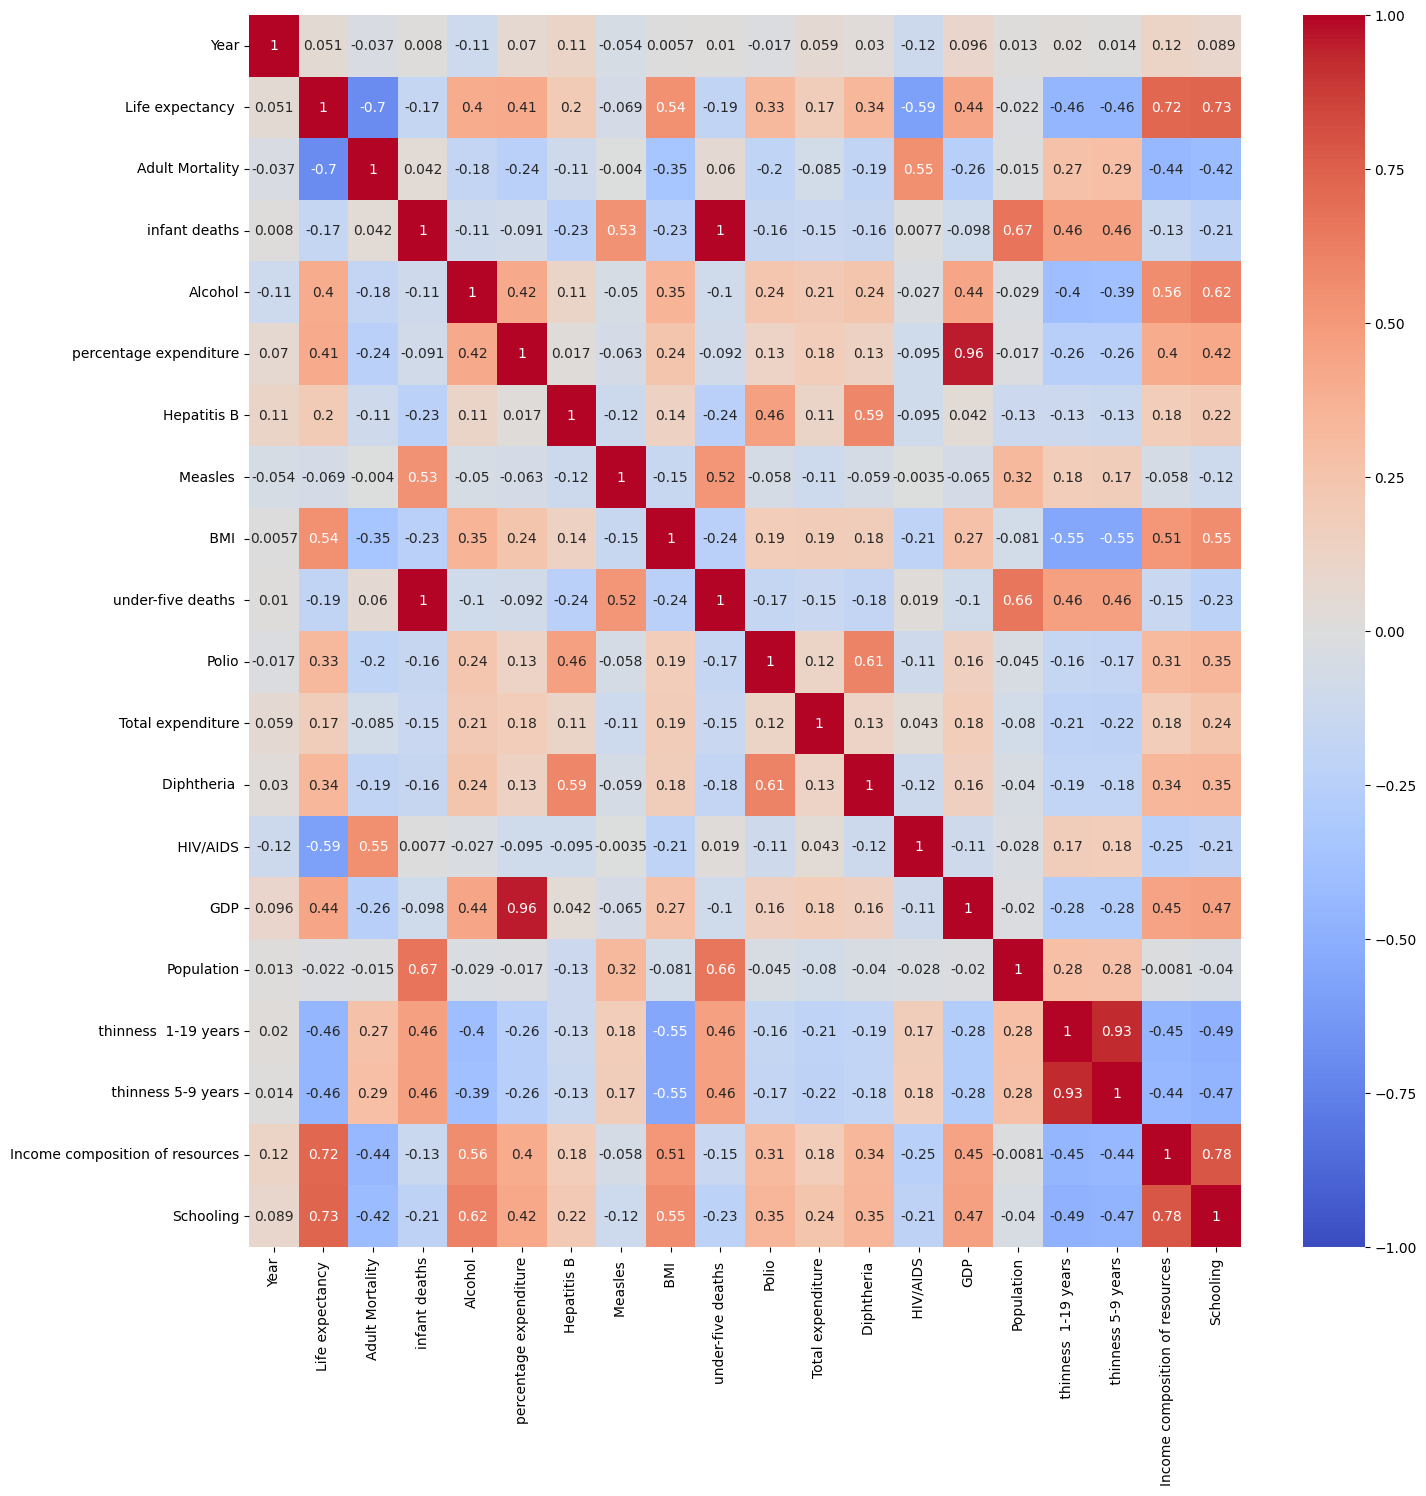

In [110]:
corr_matrix = life_df.drop(['Country', 'Status'], axis = 1).corr()

plt.figure(figsize = (16, 16))
sns.heatmap(data = corr_matrix, vmax = 1, vmin = -1, cmap = 'coolwarm', annot = True)

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

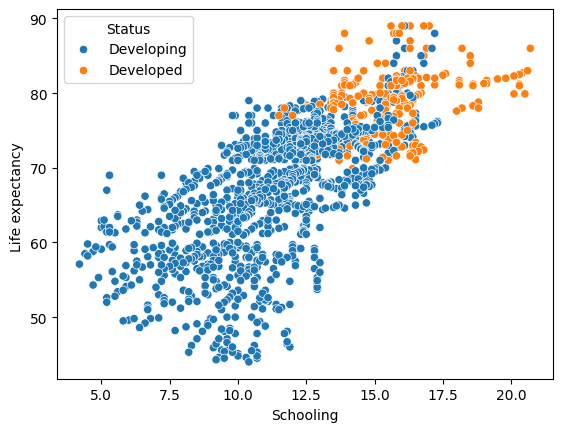

In [111]:
sns.scatterplot(data = life_df, x = 'Schooling', y = 'Life expectancy ', hue = 'Status')

## Training

In [112]:
life_df = life_df.drop(['Country', 'Status'], axis = 1)

X = life_df.drop(['Life expectancy '], axis = 1)
y = life_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

linear_reg = LinearRegression()

linear_reg.fit(X_train[['Schooling']], y_train)

y_pred = linear_reg.predict(X_test[['Schooling']])

print('R^2: {}'.format(linear_reg.score(X_test[['Schooling']], y_test)))
print('MAE: {}'.format(mean_absolute_error(y_pred, y_test)))

R^2: 0.480064465365198
MAE: 4.51225549718629


## Visulization

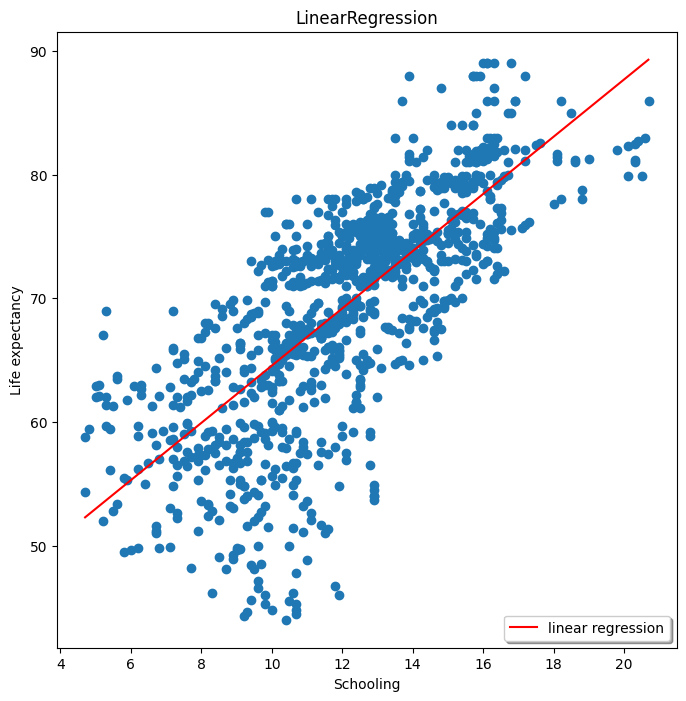

In [123]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.scatter(x = X_train['Schooling'], y = y_train)

# 接下来生成预测曲线

# 第一步，得到X的范围
xMax = X_train['Schooling'].max()
xMin = X_train['Schooling'].min()

x = np.arange(xMin, xMax, 0.01)

# 第二步，使用回归器对所有的x进行预测
reg = LinearRegression()

y = reg.fit(X_train[['Schooling']].values.reshape(-1, 1), y_train.values).predict(x.reshape(-1, 1))

ax.plot(x, y, 'r', label = 'linear regression')

ax.set_xlabel('Schooling')
ax.set_ylabel('Life expectancy')

ax.set_title('LinearRegression')
ax.legend(loc = 'lower right', shadow = True)

plt.show()